In [2]:
import os
import numpy as np
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D

In [3]:
print("Initializing")
Nmax = 50
Niter1 = 100
Niter2 = 1000
V1 = np.zeros((Nmax, Nmax), float) #create matrix with all zeros
V2 = np.zeros((Nmax, Nmax), float) #create matrix with all zeros
print(np.shape(V1))

Initializing
(50, 50)


In [4]:
for k in range(0, Nmax-1): 
    V1[k, 0] = 100.0 #set BC for V[i, 0]=100V
    V2[k, 0] = 100.0 

In [5]:
for iter in range(Niter):
    for i in range(1, Nmax-1):
        for j in range(1, Nmax-1): 
            V1[i, j] = 0.25 * (V1[i+1, j] + V1[i-1,j] + V1[i, j+1] + V1[i,j-1])
            V2[i, j] = 0.25 * (V2[i+1, j] + V2[i-1,j] + V2[i, j+1] + V2[i,j-1])

NameError: name 'Niter' is not defined

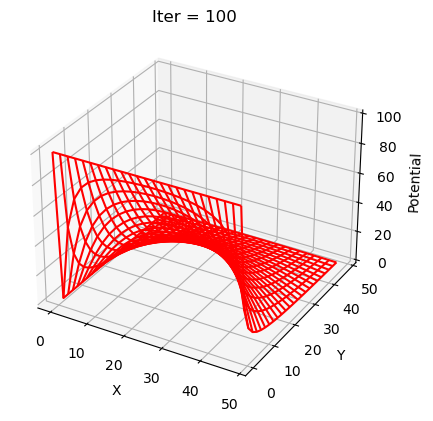

In [ ]:
#plot every other points to make 3d plot
x = range(0, Nmax-1, 2)
y = range(0, 50, 2)

X, Y = p.meshgrid(x, y)

def func(V):
    z = V[X, Y]
    return z

Z1 = func(V1)
Z2 = func(V2)
fig = p.figure()
# ax = Axes3D(fig)
ax=fig.add_subplot(111,projection='3d')
ax.plot_wireframe(X, Y, Z1, color = 'r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
ax.set_title('Iter = 100', loc='center')
p.show()


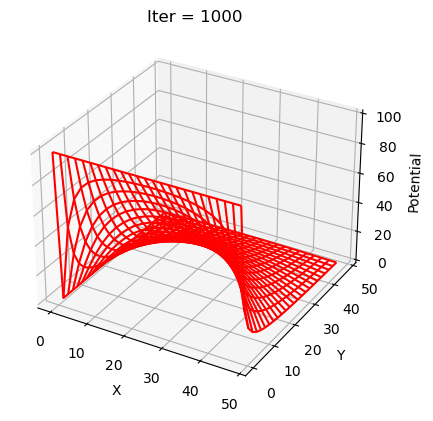

In [ ]:
fig = p.figure()
# ax = Axes3D(fig)
ax=fig.add_subplot(111,projection='3d')
ax.plot_wireframe(X, Y, Z2, color = 'r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
ax.set_title('Iter = 1000', loc='center')
p.show()

In [ ]:
V_diff = V2 - V1
print(V_diff)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# PDE with SOR
- sucessive over-relaxation

In [ ]:
Nmax = 50
w = 1.0 #weight = 1
tol = 1.0
Niter = 0
r = np.zeros((Nmax, Nmax), float)
while ((tol > 10**(-6)) and (Niter <= 1000)):
    tot = 0.0
    for i in range(1, Nmax-1):
        for j in range(1, Nmax-1): 
            r[i, j] = w * (V1[i+1, j] + V1[i-1,j] + V1[i, j+1] + V1[i,j-1] - 4.0*V[i,j]) / 4.0
            V[i,j] += r[i,j]
            
            if abs(r[i, j] > tot):
                tol = abs(r)
    Niter += 1
            

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()